# Автоматизация определения числа кластеров
Рассмотренные ниже методы работают не только для иерархического анализа. Ранее были рассмотрены визуальные методы определения числа кластеров:
- дедрограммы
- каменистая осыпь/локоть

Данные визуальные методы субъективны.

Сегодня применяются подходы автоматического определния числа кластеров, основанные на критериях качества. Необходимо научиться измерять качество. Известно более 60 методов, но все они не оптимальны.

http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8&mobileaction=toggle_view_desktop

Разберем метод Силуэт (Silhouette), который часто используется в пайтоне.
## Силуэт
Алгоритм метода следующий
1. Вычисляется **компактность**: среднее расстояние от наблюдаемого объекта до других объектов в этом кластере.
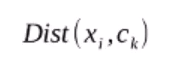


2. Вычисляется **отделимость**: среднее расстояние от наблюдаемого объекта до объектов из ближайшего другого кластера.

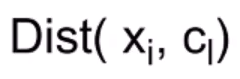

3. Вычисляется силуэт: **(отделимость - компактность) / большее из двух этих чисел**

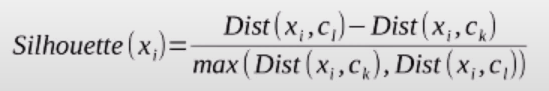

4. Среднее по кластеру, по всей выборке

### Рассмотрим пример работы алгоритма.
Имеется 3 кластера. Выберем из синего кластера объект А. Рассчитаем компактность: чем она меньше, тем лучше объект вписался в кластер. Вычисляется как среднее всех расстояний.

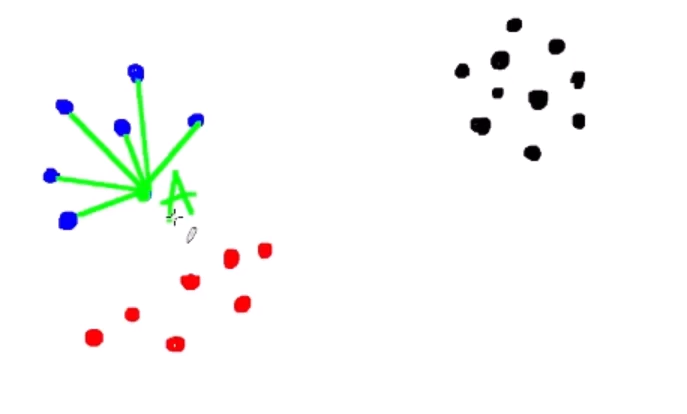

Далее вычисляется среднее расстояние от А до других объектов уже других кластеров

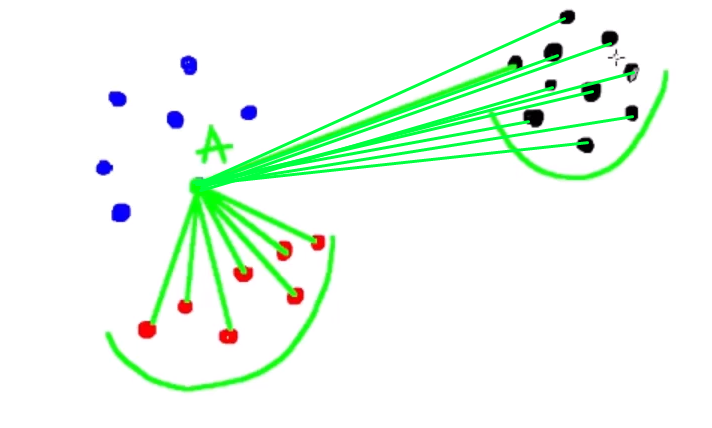

После подсчета средних расстояний от А до других объектов остальных кластеров выбирается **наименьшее** среднее расстояние. Это и будет отделимость. Это будет оценкой расстояния объекта А от соседнего ближайшего кластера. В нашем случае это красный кластер.

Далее вычитаем компактность из отделимости. Для того, чтобы оценить полученное значение, его нужно нормировать - для этого выбирается максимальное из двух чисел.

Аналогичным образом вычисляются силуэты для других точек, потом усредняем все силуэты точек в кластере - это **силуэт кластера**. Если усредним силуэты по всей выборке, то получим силуэт кластеризации.

*Соответственно, чем больше силуэт у кластеризации, тем лучше.*

Силуэт точки заключен в интервале [-1; 1].

# Силуэт при наличии ленточного кластера
Имеем 2 кластер: ленточный и шаровой. Выбираем черную точку в ленточном кластере.

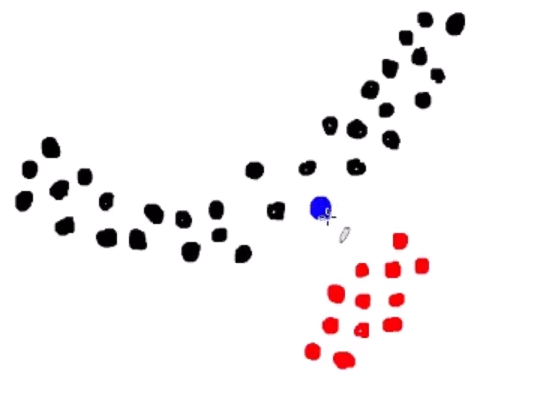

В данном случае отделимость будет меньше, чем компактность. Чем длиннее ленточный кластер, тем меньше компактность. А значит и силуэт будет отрицательным, будет стремиться к -1. 

**```Поэтому силуэт непригоден, если есть ленточные кластеры.```**

Силуэт достаточно эмпирический метод, возникают вопросы: Почему не считаем силуэт другими способами? 
- например, почему бы компатность не вычислять как среднее расстояние до центра кластера?
- Почему считаем именно среднее, а не медиану?
# Определяем число кластеров
По графику значений силуэта определяется число кластеров. Соотвественно, чем больше значение силуэта, тем лучше. По оси Y значение силуэта для разных кластеризаций

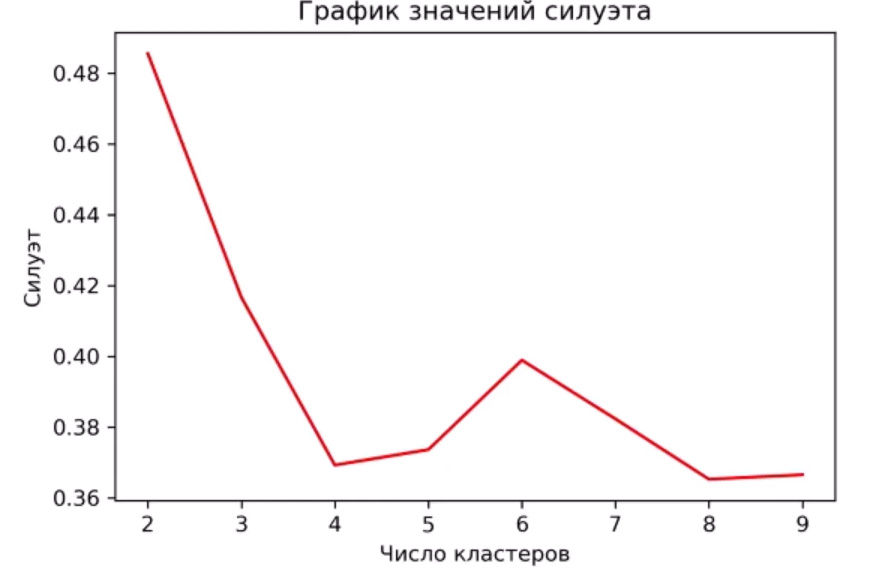

В данном случае, логично выбрать 2 кластера или 3. Однако не так часто нам интересно решение с 2 кластерами, это неинформативно. Поэтому лучше выбрать локальный максимум при 6 кластерах.
# Выводы по силуэту
Это далеко не оптимальный выбор при определении качества кластеризации, особенно, если присутствуют ленточные кластеры.
# Метод толпы. NbClust.
Методы, перечисленные в начале лекции, все неоптимальны и порой дают значительно отличающиеся показатели качества кластеризации. Идея NbClust заключается в том, чтобы прогнать все методы и выбрать то число кластеров, за которое "голосуют" большинство.

Проблема заключается в том, что такого метода нет в питоне, есть только в R. Как вариант - использование **rpy2** - интерфейс для запуска R, встроенный в процесс Python.

https://rpy2.github.io/

Идея толпы описана в "Мудрость толпы" Джеймса Шуровьески